In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import re
from sklearn.decomposition import PCA

In [2]:
from transformers import *

model = AlbertModel.from_pretrained("sanskrit_albert")

2022-04-24 10:45:18.648894: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-24 10:45:18.648913: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Some weights of the model checkpoint at sanskrit_albert were not used when initializing AlbertModel: ['predictions.dense.weight', 'predictions.dense.bias', 'predictions.LayerNorm.bias', 'predictions.bias', 'predictions.decoder.weight', 'predictions.LayerNorm.weight', 'predictions.decoder.bias']
- This IS expected if you are initializing AlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertModel from the checkpoint of a mo

In [3]:
model.eval()

AlbertModel(
  (embeddings): AlbertEmbeddings(
    (word_embeddings): Embedding(32001, 128, padding_idx=0)
    (position_embeddings): Embedding(514, 128)
    (token_type_embeddings): Embedding(1, 128)
    (LayerNorm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): AlbertTransformer(
    (embedding_hidden_mapping_in): Linear(in_features=128, out_features=768, bias=True)
    (albert_layer_groups): ModuleList(
      (0): AlbertLayerGroup(
        (albert_layers): ModuleList(
          (0): AlbertLayer(
            (full_layer_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (attention): AlbertAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (attention_dropout): Dropout(p=0.1, inplace=False)
  

In [4]:
atokenizer = AlbertTokenizer.from_pretrained("sanskrit_albert")

In [5]:
def get_sen_emb(sen):
    enc = atokenizer.encode(sen)
    ps = model(torch.tensor(enc).unsqueeze(1))
    sentence_embedding = torch.mean(ps[1], dim=0) #mean of all tokens embeddings will be consideres as sentence embedding
    s=sentence_embedding.cpu().detach().numpy()
    s=s.reshape(s.shape[0])
    return(s)

In [6]:
def plot_embd(em_np):
    plt.hist(em_np,edgecolor="yellow",bins=20)
    plt.show()
    

In [7]:
s1=get_sen_emb("अपि स्वर्णमयी लङ्का न मे लक्ष्मण रोचते । जननी जन्मभूमिश्च स्वर्गादपि गरीयसी ॥")
print(s1.shape)
#print(s1)

(768,)


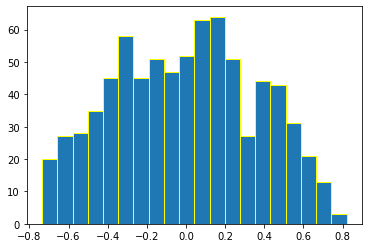

In [8]:
plot_embd(s1)

In [9]:
s= """तावदेव राजा सिंहरथः केवलम् अध्यापने एव पुरुषार्थं कर्तुं विचारयति स्म । सः राजप्रासादे निवसन् अपि साधुः इव जीवति स्म । अवसरं प्राप्य तेन स्वस्मै अधिकारिणे राज्यस्य दायित्वं प्रदत्तम् आसीत् । अनन्तरं विमलवाहनात् तेन दीक्षा अङ्गीकृता । दीक्षानन्तरं सः आत्मशुद्धौ एव स्वस्य सम्पूर्णं जीवनं योजितवान् । घोरतपस्यां कृत्वा तेन तीर्थङ्करगोत्रस्य बन्धनं कृतम् आसीत् । अन्ते भगवान् धर्मनाथः आराधकपदं प्राप्य स्वर्गलोकं गतवान् आसीत् ।
भगवतः धर्मनाथस्य जन्मनः एकादशदिनानाम् अवसाने राज्ञा भानुना नामकरणसंस्कारविधिः आयोजितः । तस्मिन् दिने जनैः उत्सवः अपि आचरितः आसीत् । स्वर्गलोकात् अपि बहवः देवाः समागताः । लोकान्तिकदेवैः चापि उत्सवम् आचरितम् आसीत् । उत्सवे तेषां देवानाम् उपस्थितिः आवश्यकी वर्तते । राज्यस्य नागरिकाः अपि प्रसन्नाः आसन् ।
नामकरणोत्सवे बालकस्य नामकरणं क्रियते । अतः राजा नामकरणाय देवतानां, जनानां च परामर्शं पृष्टवान् । सुव्रता बालकं नीत्वा आयोजितं स्थलं प्राप्तवती । बालकं दृष्ट्वा जनाः स्तब्धाः अभवन् । बालकस्य शरीरे महत्तेजः दृश्यते स्म । नामकरणाय सर्वैः स्वमतानि प्रदत्तानि आसन् ।
गर्भकालस्य घटनां विचार्य राज्ञा स्वस्य विचारः उक्तः यत् – “गर्भकालसमये सुव्रतायाः मनसि धार्मिकविचाराः आगताः । तस्याः मनसि धार्मिकोपासनां कर्तुम् इच्छा उद्भूता । तया प्रयत्नपूर्वकम् उपासना कृता । अतः अस्य बालकस्य नाम धर्मकुमारः इति करणीयम् । सर्वैः जनैः, देवैः च समर्थनं प्रदत्तम् । ततः आरभ्य एषः धर्मनाथः इति नाम्ना ख्यातः अस्ति ।"""

In [10]:
li = s.split("।")[0:-1]

In [11]:
li = [i+"।" for i in li] 

In [12]:
li =[re.sub("\n","",i) for i in li]

In [13]:
print(len(li))

25


#### embeddings of all sentences

In [14]:
emb_li=[]

In [15]:
for i in li:
    emb_li.append(get_sen_emb(i))

In [16]:
print(emb_li[24].shape)

(768,)


In [17]:
type(emb_li[0])

numpy.ndarray

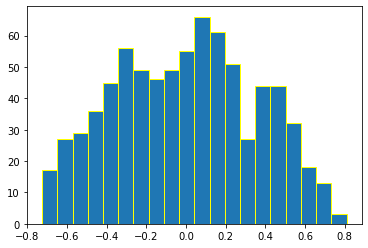

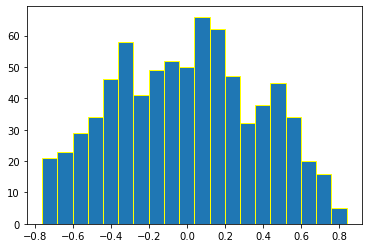

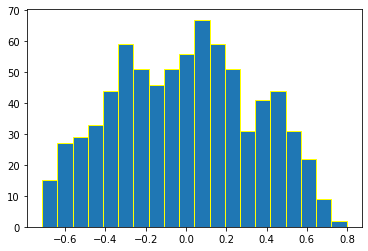

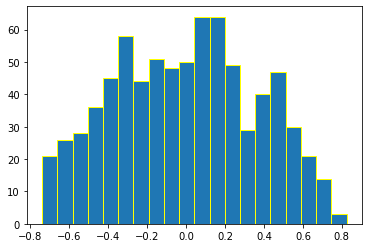

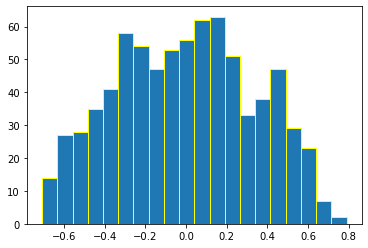

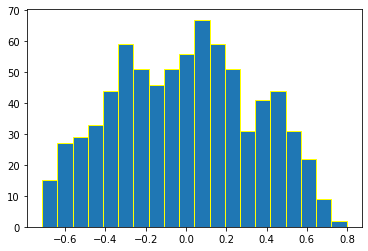

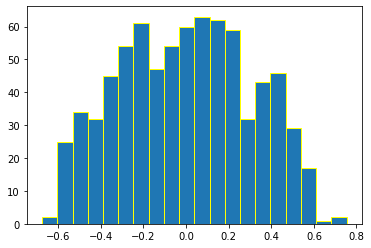

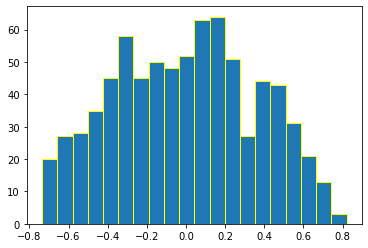

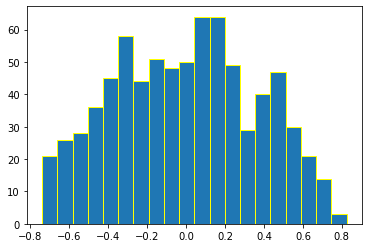

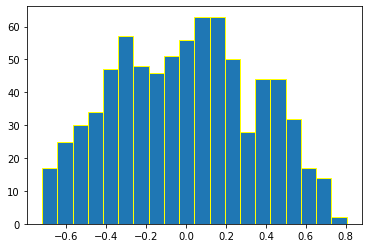

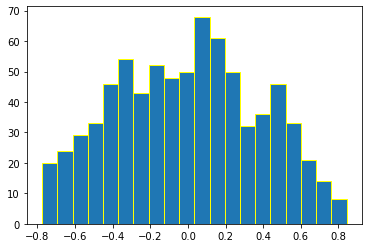

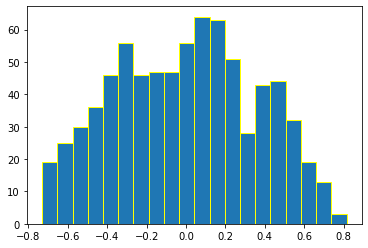

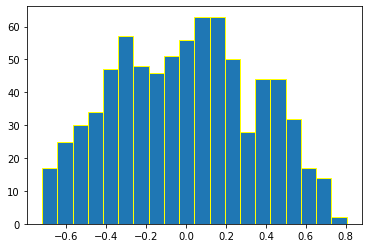

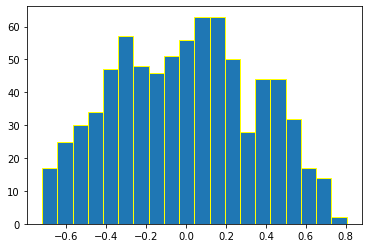

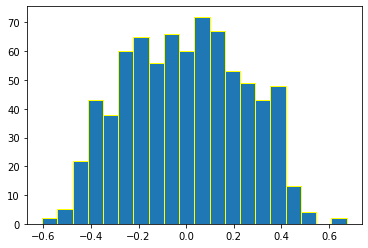

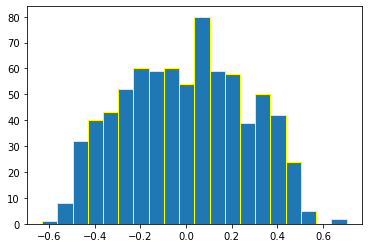

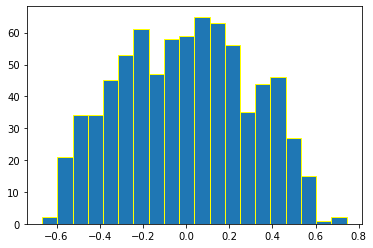

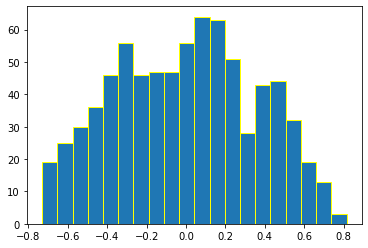

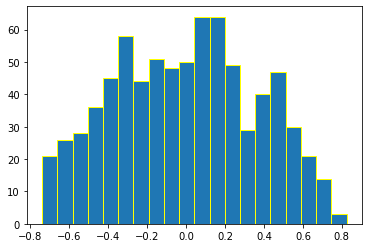

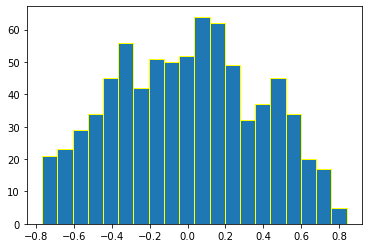

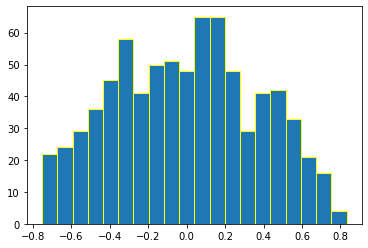

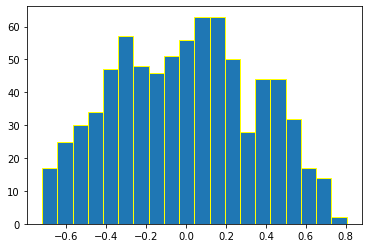

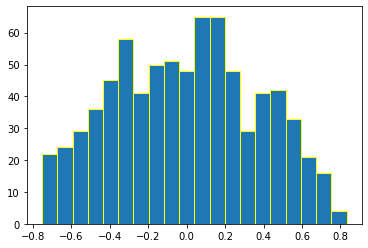

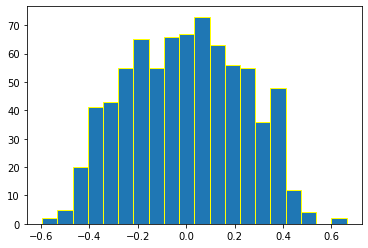

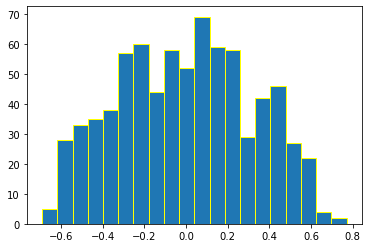

In [18]:
for i in emb_li:
    plot_embd(i)

In [19]:
t=np.array(emb_li)

In [20]:
t.shape

(25, 768)

In [21]:
X = np.array([[5,3],
     [10,15],
     [15,12],
     [24,10],
     [30,45],
     [85,70],
     [71,80],
     [60,78],
     [55,52],
     [80,91],])

In [22]:
X[0].shape

(2,)

In [23]:
t[0].shape

(768,)

In [24]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(t)

KMeans(n_clusters=2)

In [25]:
cen = kmeans.cluster_centers_

In [26]:
lab =kmeans.labels_
print(lab)

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0]


### finding cosine similarity

In [27]:
from numpy import dot
from numpy.linalg import norm



In [28]:
cos_sim_li =[]
for i in range(len(t)):
    cos_sim_li.append(dot(cen[1], t[i])/(norm(cen[1])*norm(t[i])))

In [29]:
cos_sim_li

[0.98714167,
 0.9903673,
 0.9780981,
 0.965277,
 0.9663197,
 0.9784635,
 0.9776842,
 0.9724893,
 0.9918515,
 0.99413943,
 0.9828515,
 0.9842521,
 0.9808099,
 0.95785993,
 0.9522243,
 0.959477,
 0.9824399,
 0.9817298,
 0.98409116,
 0.96510565,
 0.9494663,
 0.9872397,
 0.9710168,
 0.9680359,
 0.9900147]

In [30]:
(dot(cen[0], s1)/(norm(cen[0])*norm(s1)))

0.9744219

In [31]:
s1=get_sen_emb("werf vfg rth fghtrj  rrfety")

In [32]:
s1

array([-3.46108407e-01, -3.22425854e-03, -1.02638938e-01,  1.45340338e-01,
       -1.09345391e-02, -1.50730178e-01,  5.30229986e-01, -2.14082420e-01,
       -4.74139959e-01,  1.35158867e-01, -7.03713000e-02,  3.20124596e-01,
       -2.85587400e-01,  3.78769755e-01, -5.00640631e-01, -3.15147161e-01,
        3.53482574e-01, -8.25179294e-02, -2.96920866e-01,  5.77422678e-01,
       -1.84278980e-01,  2.49512687e-01, -4.08614397e-01,  1.75207987e-01,
       -7.21282661e-01, -2.11113200e-01,  1.75481096e-01,  7.33939484e-02,
        2.95417458e-01, -4.22039598e-01,  3.38127851e-01,  2.72631615e-01,
        6.40399083e-02,  4.14879292e-01,  1.79825604e-01, -1.44152492e-01,
        3.12794954e-01, -2.64817089e-01,  9.65274051e-02,  2.67474085e-01,
        4.34058271e-02,  2.46948913e-01,  1.34899886e-02, -4.28590387e-01,
        9.47800279e-02, -3.42522383e-01, -5.90951145e-02, -2.05184460e-01,
        6.65634453e-01, -5.54647744e-01, -1.09917186e-01, -3.83918062e-02,
       -1.78276882e-01, -

#### Finding Eucledian distance measure

In [33]:
edist_li=[]
for i in range(len(t)):
    edist_li.append(np.linalg.norm(cen[0]-t[i]))

In [34]:
li_dis=[]
for i in zip(edist_li,lab):
    li_dis.append(list(i))

In [35]:
npli = np.array(li_dis).T

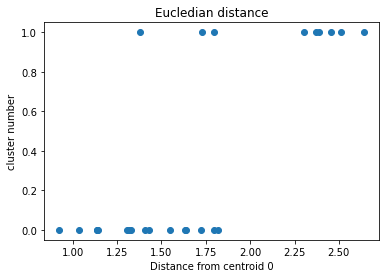

In [37]:

#print(x)
plt.title("Eucledian distance")
plt.scatter(npli[0],npli[1])
plt.xlabel("Distance from centroid 0")
plt.ylabel("cluster number")
plt.show()

In [38]:
from math import sqrt

#create function to calculate Manhattan distance 
def manhattan(a, b):
    return sum(abs(val1-val2) for val1, val2 in zip(a,b))

In [39]:
manhattan([0],t[0])

0.22487208247184753

In [40]:
man_dis_li =[]
for i in range(len(t)):
    man_dis_li.append(manhattan(cen[0],t[i]))

In [41]:
man_dis=[]
for i in zip(man_dis_li,lab):
    man_dis.append(list(i))

In [42]:
m_np_li = np.array(man_dis).T

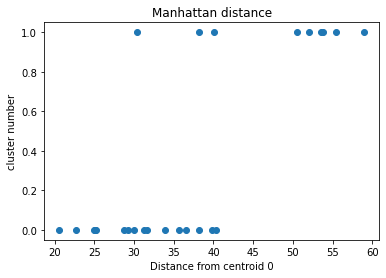

In [44]:

plt.title("Manhattan distance")
plt.scatter(m_np_li[0],m_np_li[1])
plt.xlabel("Distance from centroid 0")
plt.ylabel("cluster number")
plt.show()

### PCA

In [45]:

pca_dim = PCA(n_components=4)
p_dims = pca_dim.fit_transform(t)


In [46]:
p_dims.shape

(25, 4)

#### kmeans

In [102]:
pc_kmeans = KMeans(n_clusters=2)
pc_kmeans.fit(p_dims)

KMeans(n_clusters=2)

In [103]:
pc_lab =pc_kmeans.labels_
print(pc_lab,"\n",lab)

[0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1] 
 [0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1]


In [104]:
pc_cen = pc_kmeans.cluster_centers_

In [105]:
pc_cen.shape

(2, 4)

In [141]:
pc_cen

array([[-0.6323386 ,  0.0288893 ,  0.11372276,  0.03462077],
       [ 0.9485077 , -0.04333395, -0.17058405, -0.05193121]],
      dtype=float32)

In [106]:
pc_cos_sim_li =[]
for i in range(len(t)):
    pc_cos_sim_li.append(dot(pc_cen[0], p_dims[i])/(norm(pc_cen[0])*norm(p_dims[i])))

In [120]:
dic={}




In [121]:
pc_cos_sim_li

[0.005489677,
 -0.4261848,
 0.5624271,
 0.49022648,
 0.91321903,
 0.41313344,
 0.4526885,
 0.38990393,
 -0.70333135,
 -0.7570472,
 -0.7077284,
 0.008862369,
 -0.62665796,
 0.8639304,
 0.8106701,
 0.4978293,
 -0.6927776,
 -0.52484936,
 -0.5332395,
 0.36252433,
 0.6843878,
 -0.35386515,
 0.16037975,
 0.29263973,
 -0.9265161]

In [122]:
for i  in range(len(p_dims)):
    dic[i] = pc_cos_sim_li[i]

In [123]:
dic

{0: 0.005489677,
 1: -0.4261848,
 2: 0.5624271,
 3: 0.49022648,
 4: 0.91321903,
 5: 0.41313344,
 6: 0.4526885,
 7: 0.38990393,
 8: -0.70333135,
 9: -0.7570472,
 10: -0.7077284,
 11: 0.008862369,
 12: -0.62665796,
 13: 0.8639304,
 14: 0.8106701,
 15: 0.4978293,
 16: -0.6927776,
 17: -0.52484936,
 18: -0.5332395,
 19: 0.36252433,
 20: 0.6843878,
 21: -0.35386515,
 22: 0.16037975,
 23: 0.29263973,
 24: -0.9265161}

In [137]:
dic0,dic1 ={},{}
for i,v in dic.items():
    #print(i,v)
    if(pc_lab[i] == 0):
        dic0[i] = v
    elif(pc_lab[i] == 1):
        dic1[i] = v


In [140]:
dic0

{0: 0.005489677,
 2: 0.5624271,
 3: 0.49022648,
 4: 0.91321903,
 5: 0.41313344,
 6: 0.4526885,
 7: 0.38990393,
 11: 0.008862369,
 13: 0.8639304,
 14: 0.8106701,
 15: 0.4978293,
 19: 0.36252433,
 20: 0.6843878,
 22: 0.16037975,
 23: 0.29263973}

### 

In [117]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [86]:
#### pca manhattan

In [87]:
pman_dis_li =[]
for i in range(len(t)):
    pman_dis_li.append(manhattan(pc_cen[0],p_dims[i]))

In [88]:
pman_dis=[]
for i in zip(pman_dis_li,pc_lab):
    pman_dis.append(list(i))

In [89]:
pm_np_li = np.array(pman_dis).T

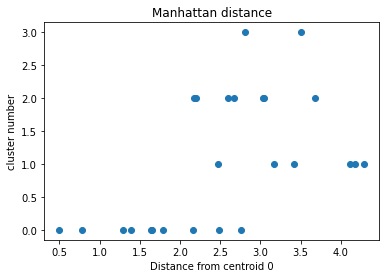

In [90]:

plt.title("Manhattan distance")
plt.scatter(pm_np_li[0],pm_np_li[1])
plt.xlabel("Distance from centroid 0")
plt.ylabel("cluster number")
plt.show()

#### Finding Eucledian distance measure

In [91]:
pedist_li=[]
for i in range(len(p_dims)):
    pedist_li.append(np.linalg.norm(pc_cen[0]-p_dims[i]))

In [92]:
pli_dis=[]
for i in zip(pedist_li,pc_lab):
    pli_dis.append(list(i))

In [93]:
pnpli = np.array(pli_dis).T

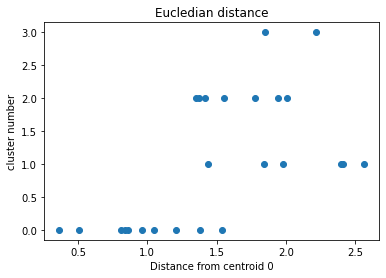

In [94]:

plt.title("Eucledian distance")
plt.scatter(pnpli[0],pnpli[1])
plt.xlabel("Distance from centroid 0")
plt.ylabel("cluster number")
plt.show()